In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn
import seaborn as sns

In [2]:
!pwd

/home/user/energygpt/TTM_results/Mix_beats


In [3]:
# datasets = ['Sceaux-c-168-p-168', 'Borealis-c-168-p-168', 'LCL-c-168-p-168', 'SMART-c-168-p-168', 'IDEAL-c-168-p-168']#, 'Bareilly', 'Mathura', 'DGS', 'Prayas', 'MFRED', 'NEEA', 'NEST', 'Ireland']
#datasets_nonscalled = ['BDG-2_non_scaling', 'Electricity_nonscaling', 'Buildings-900k-test_nonscaling']
datasets = ['Prayas']

In [4]:
def load_results(datasets):
    results = []
    for dataset in datasets:
        print(dataset)
        df = pd.read_csv(f'{dataset}/result.csv')
        df.insert(0, 'dataset', dataset)    
        print(df.shape)
        results.append(df)            
    results_df = pd.concat(results)
    return results_df

In [5]:
res = load_results(datasets)
print(res.shape)

Prayas
(24, 6)
(24, 6)


In [6]:
res

,dataset,building_ID,CVRMSE,NRMSE,MAE,Avg_Test_Loss
0,Prayas,eMARC-1H_H134,1.404668,140.466758,0.031568,0.420941
1,Prayas,eMARC-1H_H010,1.355219,135.521894,0.165610,0.518616
2,Prayas,eMARC-1H_H042,0.773721,77.372132,0.657336,0.653848
3,Prayas,eMARC-1H_H057,1.518510,151.851044,0.131740,0.485076
4,Prayas,eMARC-1H_H004,1.087846,108.784566,0.523922,0.346214
5,Prayas,eMARC-1H_H052,1.643668,164.366846,0.048613,0.371389
6,Prayas,eMARC-1H_H084,1.761149,176.114854,0.157391,0.429768
7,Prayas,eMARC-1H_H122,1.164005,116.400520,0.264196,0.254332
8,Prayas,eMARC-1H_H066,2.139802,213.980201,0.012221,0.320905
9,Prayas,eMARC-1H_H019,0.743325,74.332517,0.216757,0.366158


In [7]:
filename = '/home/user/New_Buildings_Datasets/Residential/Prayas/raw/eMAR daily consumption(in).csv'
df_daily = pd.read_csv(filename)
df_daily

,Region,Household type,household_id,Deployment type,deployment_id,Date,Daily consumption (kWh)
0,Pune city,With Air Conditioners,H002,appliance,D0003,12/22/2019,1.039917
1,Pune city,With Air Conditioners,H002,appliance,D0003,12/23/2019,0.930054
2,Pune city,With Air Conditioners,H002,appliance,D0003,12/24/2019,1.059936
3,Pune city,With Air Conditioners,H002,appliance,D0003,12/25/2019,1.270020
4,Pune city,With Air Conditioners,H002,appliance,D0003,12/26/2019,1.010010
...,...,...,...,...,...,...,...
111275,Pune city,Water Heaters but no AC,H016,appliance,D0031,3/17/2020,1.300000
111276,Pune city,Water Heaters but no AC,H016,appliance,D0031,3/18/2020,1.600000
111277,Pune city,Water Heaters but no AC,H016,appliance,D0031,3/19/2020,1.500000
111278,Pune city,Water Heaters but no AC,H016,appliance,D0031,3/20/2020,1.600000


In [8]:
df_daily[df_daily.household_id == 'H002']['Region']

0        Pune city
1        Pune city
2        Pune city
3        Pune city
4        Pune city
           ...    
67393    Pune city
67394    Pune city
67395    Pune city
67396    Pune city
67397    Pune city
Name: Region, Length: 1815, dtype: object

In [11]:
res['building_name'] = res.building_ID.apply(lambda x: x.split("_")[-1])
res

,dataset,building_ID,CVRMSE,NRMSE,MAE,Avg_Test_Loss,building_name
0,Prayas,eMARC-1H_H134,1.404668,140.466758,0.031568,0.420941,H134
1,Prayas,eMARC-1H_H010,1.355219,135.521894,0.165610,0.518616,H010
2,Prayas,eMARC-1H_H042,0.773721,77.372132,0.657336,0.653848,H042
3,Prayas,eMARC-1H_H057,1.518510,151.851044,0.131740,0.485076,H057
4,Prayas,eMARC-1H_H004,1.087846,108.784566,0.523922,0.346214,H004
5,Prayas,eMARC-1H_H052,1.643668,164.366846,0.048613,0.371389,H052
6,Prayas,eMARC-1H_H084,1.761149,176.114854,0.157391,0.429768,H084
7,Prayas,eMARC-1H_H122,1.164005,116.400520,0.264196,0.254332,H122
8,Prayas,eMARC-1H_H066,2.139802,213.980201,0.012221,0.320905,H066
9,Prayas,eMARC-1H_H019,0.743325,74.332517,0.216757,0.366158,H019


In [12]:
city = {}
for each in res.building_name.unique():
    city[each] = df_daily[df_daily.household_id == each]['Region'].values[0]
city 

{'H134': 'Aurangabad',
 'H010': 'Pune city',
 'H042': 'Pune city',
 'H057': 'Kanpur rural',
 'H004': 'Pune city',
 'H052': 'Kanpur rural',
 'H084': 'Pune',
 'H122': 'Aurangabad',
 'H066': 'Kanpur rural',
 'H019': 'Pune city',
 'H091': 'Pune',
 'H069': 'Gonda',
 'H037': 'Pune city',
 'H125': 'Aurangabad',
 'H089': 'Pune',
 'H099': 'Kanpur rural',
 'H018': 'Pune city',
 'H136': 'Aurangabad',
 'H115': 'Aurangabad',
 'H043': 'Pune city',
 'H090': 'Pune',
 'H032': 'Pune city',
 'H133': 'Aurangabad',
 'H137': 'Aurangabad'}

In [13]:
def ind(row):
    return city[row]

In [14]:
res['region'] = res['building_name'].apply(ind)
res

,dataset,building_ID,CVRMSE,NRMSE,MAE,Avg_Test_Loss,building_name,region
0,Prayas,eMARC-1H_H134,1.404668,140.466758,0.031568,0.420941,H134,Aurangabad
1,Prayas,eMARC-1H_H010,1.355219,135.521894,0.165610,0.518616,H010,Pune city
2,Prayas,eMARC-1H_H042,0.773721,77.372132,0.657336,0.653848,H042,Pune city
3,Prayas,eMARC-1H_H057,1.518510,151.851044,0.131740,0.485076,H057,Kanpur rural
4,Prayas,eMARC-1H_H004,1.087846,108.784566,0.523922,0.346214,H004,Pune city
5,Prayas,eMARC-1H_H052,1.643668,164.366846,0.048613,0.371389,H052,Kanpur rural
6,Prayas,eMARC-1H_H084,1.761149,176.114854,0.157391,0.429768,H084,Pune
7,Prayas,eMARC-1H_H122,1.164005,116.400520,0.264196,0.254332,H122,Aurangabad
8,Prayas,eMARC-1H_H066,2.139802,213.980201,0.012221,0.320905,H066,Kanpur rural
9,Prayas,eMARC-1H_H019,0.743325,74.332517,0.216757,0.366158,H019,Pune city


In [6]:
#res[res.nrmse > 

In [7]:
# res.columns

In [8]:
#res

In [9]:
cols = ['sMAPE', 'nrmse', 'nrmse_eve']
res_agg1 = res[cols].agg( {'sMAPE': ['mean', 'std', 'median'],
                            'nrmse': ['mean', 'std', 'median'],
                            'nrmse_eve':['mean', 'std', 'median'] })
res_agg1

/home/user/miniconda3/envs/tfm_env/lib/python3.10/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,sMAPE,nrmse,nrmse_eve
mean,0.715879,inf,1.105606
std,0.350208,NaN,0.479859
median,1.000000,0.791221,1.011425


In [10]:
cols = [ 'nrmse']
res_agg1 = res[cols].agg( {'nrmse': ['mean', 'std', 'median']})
res_agg1*100

/home/user/miniconda3/envs/tfm_env/lib/python3.10/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,nrmse
mean,inf
std,NaN
median,79.122051


In [11]:
# cols = ['dataset', 'sMAPE', 'nrmse','nrmse_eve']

# res_agg1 = res[cols].groupby(['dataset']).agg( {'sMAPE': ['mean', 'std', 'median'],
#                                                         'nrmse': ['mean', 'std', 'median'],
#                                               'nrmse_eve': ['mean', 'std', 'median'] })

# res_agg1.mul(100).round(2).to_csv('./results/commercial.csv')
# res_agg1.mul(100).round(2).to_latex('./results/commercial.tex')
# res_agg1.mul(100).round(2)

In [14]:
cols = ['dataset', 'nrmse', 'nrmse_eve', 'rmse']

res_agg1 = res[cols].groupby(['dataset']).agg( { #'sMAPE': ['mean', 'std', 'median'],
                                                      'rmse': ['mean', 'std', 'median'],
                                                      'nrmse': ['mean', 'std', 'median'],
                                             'nrmse_eve': ['mean', 'std', 'median'] }
                                             )
res_agg1.mul(100).round(2).to_csv('./results/residential.csv')
res_agg1.mul(100).round(2).to_latex('./results/residential.tex')
res_agg1.mul(100).round(2)

rmse               nrmse               nrmse_eve               
            mean   std median   mean    std median      mean    std  median
dataset                                                                    
LCL         9.78  2.37   9.80  90.67  31.94  86.74    158.78  70.02  146.43
SMART       9.86  2.75   9.22  75.09  14.57  73.92    123.46  27.33  128.34
SMART-star  9.05  1.71   9.23  64.27  12.46  62.71     86.97  23.86   84.25

In [17]:
new_df = res.copy()
new_df

,dataset,Unnamed: 0,building_name,mae,mape,mse,rmse,msle,rmsle,nrmse,nrmse_eve,sMAPE,filename
0,Sceaux,0,Sceaux_2007,0.091550,1.432551e+10,0.016834,0.129745,0.010749,0.103677,0.833795,1.212061,0.367870,Sceaux.csv
1,Sceaux,0,Sceaux_2008,0.077344,5.167379e+09,0.012816,0.113209,0.008320,0.091213,0.773618,1.235648,0.296060,Sceaux.csv
2,Sceaux,0,Sceaux_2009,0.075147,1.987480e+10,0.011422,0.106873,0.007610,0.087235,0.756491,1.220896,0.314883,Sceaux.csv
3,Sceaux,0,Sceaux_2010,0.090152,1.362473e+10,0.015797,0.125687,0.010119,0.100593,0.742332,1.201732,0.312290,Sceaux.csv
0,Borealis,0,home14_2011,0.069710,1.686136e+10,0.018097,0.134524,0.011232,0.105981,1.364252,1.474654,0.309858,Borealis.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,Ireland,0,H5,0.041514,2.425465e+12,0.006738,0.082085,0.004299,0.065569,0.883284,1.941663,0.189968,Ireland_residential_KW.csv
16,Ireland,0,H6,0.069025,8.359601e+12,0.011649,0.107931,0.007335,0.085642,0.848447,1.374644,1.000000,Ireland_residential_KW.csv
17,Ireland,0,H7,0.070114,8.121415e+12,0.011615,0.107773,0.007690,0.087693,0.973916,1.440874,0.331167,Ireland_residential_KW.csv
18,Ireland,0,H8,0.089819,9.176294e+12,0.019511,0.139680,0.012188,0.110400,1.026713,1.238050,0.335895,Ireland_residential_KW.csv


In [18]:
new_df['building_name'] = new_df['building_name'].apply(lambda x: str(x).split('_')[0])
new_df

,dataset,Unnamed: 0,building_name,mae,mape,mse,rmse,msle,rmsle,nrmse,nrmse_eve,sMAPE,filename
0,Sceaux,0,Sceaux,0.091550,1.432551e+10,0.016834,0.129745,0.010749,0.103677,0.833795,1.212061,0.367870,Sceaux.csv
1,Sceaux,0,Sceaux,0.077344,5.167379e+09,0.012816,0.113209,0.008320,0.091213,0.773618,1.235648,0.296060,Sceaux.csv
2,Sceaux,0,Sceaux,0.075147,1.987480e+10,0.011422,0.106873,0.007610,0.087235,0.756491,1.220896,0.314883,Sceaux.csv
3,Sceaux,0,Sceaux,0.090152,1.362473e+10,0.015797,0.125687,0.010119,0.100593,0.742332,1.201732,0.312290,Sceaux.csv
0,Borealis,0,home14,0.069710,1.686136e+10,0.018097,0.134524,0.011232,0.105981,1.364252,1.474654,0.309858,Borealis.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,Ireland,0,H5,0.041514,2.425465e+12,0.006738,0.082085,0.004299,0.065569,0.883284,1.941663,0.189968,Ireland_residential_KW.csv
16,Ireland,0,H6,0.069025,8.359601e+12,0.011649,0.107931,0.007335,0.085642,0.848447,1.374644,1.000000,Ireland_residential_KW.csv
17,Ireland,0,H7,0.070114,8.121415e+12,0.011615,0.107773,0.007690,0.087693,0.973916,1.440874,0.331167,Ireland_residential_KW.csv
18,Ireland,0,H8,0.089819,9.176294e+12,0.019511,0.139680,0.012188,0.110400,1.026713,1.238050,0.335895,Ireland_residential_KW.csv


In [20]:
grouped = new_df.groupby(['dataset', 'building_name'])

In [23]:
d = {}
for each in new_df.dataset.unique():
    l = {}
    buildings = new_df[new_df['dataset'] == each]['building_name'].unique()
    for b in buildings:
        gh = grouped.get_group((each, b))
        # print(gh)
        l[b] = gh['mae'].mean()
        # print(gh['MAE'].mean())
        # break
    d[each] = l
    # break
d

{'Sceaux': {'Sceaux': 0.08354829057971926},
 'Borealis': {'home14': 0.0697104889627235,
  'home15': 0.0581592162169615,
  'home16': 0.0694490075761371,
  'home18': 0.0725021115563926,
  'home19': 0.0620359044672065,
  'home21': 0.0474329430275526,
  'home22': 0.0624834388880665,
  'home23': 0.0443947194182227,
  'home25': 0.0587080915150359,
  'home26': 0.0646465079237295,
  'home2': 0.0701087847369438,
  'home3': 0.0636481193926807,
  'home4': 0.0552071259540204,
  'home7': 0.0717090505893378,
  'home9': 0.0263540226934774},
 'LCL': {'MAC000005': 0.03416912454193555,
  'MAC000014': 0.053979877622006255,
  'MAC000015': 0.04445117132809985,
  'MAC000017': 0.036308506567163404,
  'MAC000031': 0.07545232330102866,
  'MAC000044': 0.09501239812593809,
  'MAC000046': 0.05765202828156665,
  'MAC000048': 0.048308942527174506,
  'MAC000051': 0.06545280545478835,
  'MAC000052': 0.06004640266456985,
  'MAC000064': 0.07100276519762325,
  'MAC000065': 0.0536977474856744,
  'MAC000071': 0.0789671906

In [24]:
import numpy as np
f = {}
for key, value in d.items():
    f[key] = (np.mean(list(value.values())))
f

{'Sceaux': 0.08354829057971926,
 'Borealis': 0.05976996886123257,
 'LCL': 0.05881450764718641,
 'SMART': 0.06206212861802888,
 'IDEAL': 0.06385330004775973,
 'Bareilly': 0.06732167125557825,
 'Mathura': 0.08515265295799146,
 'DGS': 0.07186442001035515,
 'Prayas': 0.04432355922349624,
 'MFRED': 0.05123622434785016,
 'NEEA': 0.05533028700723989,
 'NEST': 0.0269695278251446,
 'Ireland': 0.06339481785331955}

In [17]:
res

,dataset,Unnamed: 0,building_name,mae,mape,mse,rmse,msle,rmsle,nrmse,nrmse_eve,sMAPE,filename,region
0,Prayas,0,H001,0.060564,5.209812e+13,0.007422,0.086151,0.005039,0.070985,0.773316,0.907498,1.000000,eMARC-1H.csv,Pune city
1,Prayas,0,H002,0.031255,4.338843e+12,0.003679,0.060654,0.002465,0.049650,0.780878,0.881119,1.000000,eMARC-1H.csv,Pune city
2,Prayas,0,H003,0.039277,6.269577e+12,0.004200,0.064809,0.002849,0.053375,0.652322,1.397320,1.000000,eMARC-1H.csv,Pune city
3,Prayas,0,H004,0.051825,6.073714e+13,0.008177,0.090426,0.004914,0.070099,1.128553,0.853418,1.000000,eMARC-1H.csv,Pune city
4,Prayas,0,H005,0.043843,6.951547e+12,0.004793,0.069233,0.003067,0.055382,0.483671,0.727745,1.000000,eMARC-1H.csv,Pune city
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,Prayas,0,H139,0.036121,8.590100e+13,0.003762,0.061333,0.002387,0.048860,1.300619,0.853805,1.000000,eMARC-1H.csv,Aurangabad
112,Prayas,0,H140,0.043637,9.442788e+13,0.003826,0.061856,0.002848,0.053363,1.082262,0.748538,1.000000,eMARC-1H.csv,Aurangabad
113,Prayas,0,H141,0.045940,1.023322e+14,0.005015,0.070820,0.003559,0.059658,1.242598,0.695452,1.000000,eMARC-1H.csv,Aurangabad
114,Prayas,0,H142,0.049671,8.385947e+13,0.007426,0.086173,0.004133,0.064292,0.865028,0.610545,0.673966,eMARC-1H.csv,Aurangabad


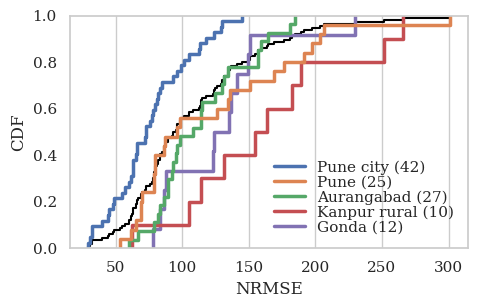

In [20]:
# def con(row, ty):
#     for i in ty:
#         if row == i:
#             op = f'{row} ({ty[row]})'
#             return op

# # sns.set()  # crazy big
# sns.set_theme(style="whitegrid", font_scale=1.0)

# date_formater = mdates.DateFormatter('%b, %d')
# plt.rcParams.update({'font.size': 14})
# plt.rcParams["font.family"] = "serif"
# plt.rcParams["figure.figsize"] = (5, 3.3)
# plt.rcParams['pdf.fonttype'] = 42
# plt.rcParams['ps.fonttype'] = 42
# # plt.figure(figsize=(5, 3.3))
# fig, ax = plt.subplots()


# copy_df = res['nrmse'].reset_index()
# all_df = pd.DataFrame(copy_df['nrmse'] * 100)
# #assembly_df
# all_df['cdf'] = all_df.rank(method = 'average', pct = True)
# ax_c = seaborn.ecdfplot(data=all_df.sort_values('nrmse'), x="nrmse", ax=ax, color='black', lw=1.5)
# # all_df.sort_values('NRMSE').plot(x = 'NRMSE', y = 'cdf', grid = True, color = 'black')
# # median = all_df.sort_values('NRMSE').quantile(0.5)
# # #plt.scatter(x = median['NRMSE'], y = median['cdf'], color = 'red')
# # #plt.text(x = xmedian['NRMSE'], median['cdf'])
# # plt.text(median['NRMSE'],  median['cdf'], '({}, {})'.format(median['NRMSE'].round(2),  median['cdf'].round(2)))
# # q_25 = all_df.sort_values('NRMSE').quantile(0.25)
# # plt.scatter(x = q_25['NRMSE'], y = q_25['cdf'], color = 'red')
# # plt.text(q_25['NRMSE'],  q_25['cdf'], '({}, {})'.format(q_25['NRMSE'].round(2),  q_25['cdf'].round(2)))
# # q_75 = all_df.sort_values('NRMSE').quantile(0.75)
# # plt.scatter(x = q_75['NRMSE'], y = q_75['cdf'], color = 'red')
# # plt.text(q_75['NRMSE'],  q_75['cdf'], '({}, {})'.format(q_75['NRMSE'].round(2),  q_75['cdf'].round(2)))
# # q_90 = all_df.sort_values('NRMSE').quantile(0.9)
# # plt.scatter(x = q_90['NRMSE'], y = q_90['cdf'], color = 'red')
# # plt.text(q_90['NRMSE'],  q_90['cdf'], '({}, {})'.format(q_90['NRMSE'].round(2),  q_90['cdf'].round(2)))

# copy_df = res.reset_index()
# copy_df['nrmse'] = copy_df['nrmse'] * 100
# # copy_df['building_type'] = copy_df.building.apply(lambda s: s.split('_')[1])
# # copy_df['site'] = copy_df.building.apply(lambda s: s.split('_')[0])
# # copy_df = copy_df[copy_df.building_type.isin(b_types)]
# copy_df.region = copy_df.region.str.capitalize()
# ty = dict(copy_df.region.value_counts())
# copy_df['region'] = copy_df.region.apply(con, ty = ty)

# copy_df = copy_df.sort_values('nrmse')


# ax_s = seaborn.ecdfplot(data=copy_df, x="nrmse", hue='region', ax=ax, lw=2.5)
# # ax_s.set_xscale('log')
# # ax_s.set_xlim(0, 200)
# # sns.move_legend(ax, "lower right", labelspacing=0.2, title='')
# sns.move_legend(ax_s, "lower right", title='', labelspacing=0.05, frameon=False)
# # sns.move_legend(ax_s, "lower right", title='', labelspacing=0.2, bbox_to_anchor=(1.7, 0.2))
# # box = ax_s.get_position()
# # print(box)
# # ax_s.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position

# # # Put a legend to the right side
# # ax_s.legend(loc='upper right', bbox_to_anchor=(1.25, 0.5), ncol=1)

# # ax_s.legend(bbox_to_anchor=(1.05, 1), loc='lower left', borderaxespad=0, title='Types')
# plt.title(label='')

# plt.ylabel("CDF")
# #plt.ylim(0,125)
# plt.xlabel("NRMSE")
# #plt.xticks(rotation=90)
# plt.grid(axis='y')
# plt.gcf().tight_layout()
# #plt.legend()
# plt.subplots_adjust(wspace=0.05, hspace=0)
# os.makedirs('Plots', exist_ok=True)
# plt.savefig("Plots/TimesFM-prayas-error-building-region-cdfplot.pdf", bbox_inches='tight')
# plt.show()

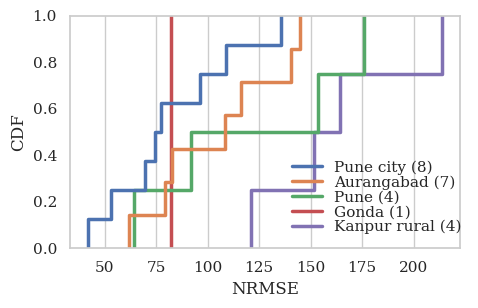

In [18]:
def con(row, ty):
    for i in ty:
        if row == i:
            op = f'{row} ({ty[row]})'
            return op

# sns.set()  # crazy big
sns.set_theme(style="whitegrid", font_scale=1.0)

date_formater = mdates.DateFormatter('%b, %d')
plt.rcParams.update({'font.size': 14})
plt.rcParams["font.family"] = "serif"
plt.rcParams["figure.figsize"] = (5, 3.3)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
# plt.figure(figsize=(5, 3.3))
fig, ax = plt.subplots()


copy_df = res['NRMSE'].reset_index()

# all_df = pd.DataFrame(copy_df['NRMSE'])
# #assembly_df
# all_df['cdf'] = all_df.rank(method = 'average', pct = True)
# ax_c = seaborn.ecdfplot(data=all_df.sort_values('NRMSE'), x="NRMSE", ax=ax, color='black', lw=1.5)

# all_df.sort_values('NRMSE').plot(x = 'NRMSE', y = 'cdf', grid = True, color = 'black')
# median = all_df.sort_values('NRMSE').quantile(0.5)
# #plt.scatter(x = median['NRMSE'], y = median['cdf'], color = 'red')
# #plt.text(x = xmedian['NRMSE'], median['cdf'])
# plt.text(median['NRMSE'],  median['cdf'], '({}, {})'.format(median['NRMSE'].round(2),  median['cdf'].round(2)))
# q_25 = all_df.sort_values('NRMSE').quantile(0.25)
# plt.scatter(x = q_25['NRMSE'], y = q_25['cdf'], color = 'red')
# plt.text(q_25['NRMSE'],  q_25['cdf'], '({}, {})'.format(q_25['NRMSE'].round(2),  q_25['cdf'].round(2)))
# q_75 = all_df.sort_values('NRMSE').quantile(0.75)
# plt.scatter(x = q_75['NRMSE'], y = q_75['cdf'], color = 'red')
# plt.text(q_75['NRMSE'],  q_75['cdf'], '({}, {})'.format(q_75['NRMSE'].round(2),  q_75['cdf'].round(2)))
# q_90 = all_df.sort_values('NRMSE').quantile(0.9)
# plt.scatter(x = q_90['NRMSE'], y = q_90['cdf'], color = 'red')
# plt.text(q_90['NRMSE'],  q_90['cdf'], '({}, {})'.format(q_90['NRMSE'].round(2),  q_90['cdf'].round(2)))

copy_df = res.reset_index()
copy_df['NRMSE'] = copy_df['NRMSE']
# copy_df['building_type'] = copy_df.building.apply(lambda s: s.split('_')[1])
# copy_df['site'] = copy_df.building.apply(lambda s: s.split('_')[0])
# copy_df = copy_df[copy_df.building_type.isin(b_types)]
copy_df.region = copy_df.region.str.capitalize()
ty = dict(copy_df.region.value_counts())
copy_df['region'] = copy_df.region.apply(con, ty = ty)

copy_df = copy_df.sort_values('NRMSE')


ax_s = seaborn.ecdfplot(data=copy_df, x="NRMSE", hue='region', ax=ax, lw=2.5)
# ax_s.set_xscale('log')
# ax_s.set_xlim(0, 200)
# sns.move_legend(ax, "lower right", labelspacing=0.2, title='')
sns.move_legend(ax_s, "lower right", title='', labelspacing=0.05, frameon=False, bbox_to_anchor=(1.04, 0.00001))
# sns.move_legend(ax_s, "lower right", title='', labelspacing=0.2, bbox_to_anchor=(1.7, 0.2))
# box = ax_s.get_position()
# print(box)
# ax_s.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position

# # Put a legend to the right side
# ax_s.legend(loc='upper right', bbox_to_anchor=(1.25, 0.5), ncol=1)

# ax_s.legend(bbox_to_anchor=(1.05, 1), loc='lower left', borderaxespad=0, title='Types')
plt.title(label='')

plt.ylabel("CDF")
#plt.ylim(0,125)
plt.xlabel("NRMSE")
#plt.xticks(rotation=90)
plt.grid(axis='y')
plt.gcf().tight_layout()
#plt.legend()
plt.subplots_adjust(wspace=0.05, hspace=0)
os.makedirs('Plots', exist_ok=True)
plt.savefig("Plots/Mix-beats-test-prayas-error-building-region-cdfplot.pdf", bbox_inches='tight')
plt.show()